<a href="https://colab.research.google.com/github/Sriram1717/World-Bank-Global-Education-Analysis/blob/main/CH_Sriram_Sureshkumar_Capstone_Project_World_Bank_Global_Education_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The World Bank EdStats All Indicator Query holds over 4,000 internationally comparable indicators that describe education access, progression, completion, literacy, teachers, population, and expenditures.The indicators cover the education cycle from pre-primary to vocational and tertiary education and also holds learning outcome data from international and regional learning assessments (e.g. PISA, TIMSS, PIRLS), equity data from household surveys, and projection/attainment data. </b>

## <b> Explore and analyze the data to identify variation of indicators across the globe, which countries are more alike and different. Feel free to add more extensive analyses and details.</b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_country_series = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Almabetter/Module 1/Week 4/Copy of EdStatsCountry-Series.csv')
df_country = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Almabetter/Module 1/Week 4/Copy of EdStatsCountry.csv')
df_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Almabetter/Module 1/Week 4/Copy of EdStatsData.csv')
df_footnote = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Almabetter/Module 1/Week 4/Copy of EdStatsFootNote.csv')
df_series = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Almabetter/Module 1/Week 4/Copy of EdStatsSeries.csv')

In [4]:
df_country_series.head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [5]:
df_country_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


In [6]:
df_country_series.rename(columns = {'CountryCode': 'Country Code', 'SeriesCode': 'Series Code'},inplace=True)
df_country_series.drop('Unnamed: 3',axis=1, inplace=True)

In [7]:
df_country_series['Country Code'].nunique()

211

In [8]:
df_country_series['Series Code'].nunique()

21

In [9]:
pd.DataFrame(df_country_series.groupby('Country Code')['Series Code'].count().sort_values(ascending=False))

,Series Code
Country Code,
GEO,18
MDA,18
MUS,12
TZA,12
MAR,12
...,...
MNE,2
MMR,2
MLT,2


### Looks like multiple countries can have same series code. Let's explore df_series to get a better understanding.

In [10]:
df_series.head(4)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df_series['Series Code'].nunique()

3665

### Look like a series code refers to a particular indicator.

In [12]:
df_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

In [13]:
df_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,60.999962,61.92268,62.69342,64.383186,65.617767,66.085152,66.608139,67.290451,68.510094,69.033211,69.944908,71.04187,71.693779,71.699097,71.995819,72.602837,70.032722,70.464821,72.645683,71.81176,73.903511,74.425201,75.110817,76.254318,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

In [15]:
df_data.loc[0,'Indicator Code']

'UIS.NERA.2'

In [16]:
df_series[df_series['Series Code'] == df_data.loc[0,'Indicator Code']]

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
3222,UIS.NERA.2,Secondary,"Adjusted net enrolment rate, lower secondary, ...",NaN,Total number of students of the official lower...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df_series[df_series['Series Code'] == df_data.loc[56789,'Indicator Code']]

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
1157,LO.PASEC.FRE5.MA,Learning Outcomes,PASEC: Mean performance on the French language...,Mean percentage correct for 5th male grade stu...,Mean percentage correct for 5th male grade stu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Programme d'Analyse des Systèmes Educatifs de ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df_series[df_series['Series Code'] == df_data.loc[7777,'Indicator Code']]

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
201,BAR.SEC.CMPT.5559.ZS,Attainment,Barro-Lee: Percentage of population age 55-59 ...,Percentage of population age 55-59 with second...,Percentage of population age 55-59 with second...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###Looks like Indicator Code is the same as Series Code.

In [19]:
df_data['Indicator Code'].nunique()

3665

In [20]:
df_series['Series Code'].nunique()

3665

In [21]:
df_country.head(2)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN


In [22]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

In [23]:
df_country['Country Code'].nunique()

241

In [24]:
df_data['Country Code'].nunique()

242

In [25]:
df_footnote['CountryCode'].nunique()

239

In [26]:
df_country_series['Country Code'].nunique()

211

In [27]:
df_footnote.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


In [28]:
df_footnote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB


In [29]:
df_footnote['SeriesCode'].nunique()

1558

In [30]:
df_footnote[df_footnote['SeriesCode'] == df_footnote.loc[0,'SeriesCode']]

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
17,ABW,SE.PRE.ENRL.FE,YR2002,Country estimation.,NaN
34,ABW,SE.PRE.ENRL.FE,YR1999,Country estimation.,NaN
43,ABW,SE.PRE.ENRL.FE,YR2006,Country estimation.,NaN
165,ABW,SE.PRE.ENRL.FE,YR2000,Country estimation.,NaN
...,...,...,...,...,...
641012,ZMB,SE.PRE.ENRL.FE,YR1998,Country estimation.,NaN
642477,ZWE,SE.PRE.ENRL.FE,YR1999,UIS estimation.,NaN
642478,ZWE,SE.PRE.ENRL.FE,YR2000,Country estimation.,NaN
642479,ZWE,SE.PRE.ENRL.FE,YR2001,UIS estimation.,NaN


In [31]:
df_data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

In [32]:
df_data = df_data[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
        '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']]

In [33]:
count = 0
my_list = []
for elem in df_data['Indicator Name']:
  if 'Expenditure' in elem:
    my_list.append(df_data.loc[count,:])     
  else:
    pass
  count = count + 1

In [34]:
df_exp_data = pd.DataFrame(my_list)

In [35]:
df_exp_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
1224,Arab World,ARB,Expenditure on education as % of total governm...,SE.XPD.TOTL.GB.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1225,Arab World,ARB,Expenditure on education not allocated by leve...,UIS.XPUBP.UK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1226,Arab World,ARB,Expenditure on lower secondary as % of governm...,UIS.XPUBP.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1227,Arab World,ARB,Expenditure on lower secondary as % of total g...,UIS.XGOVEXP.IMF.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1228,Arab World,ARB,Expenditure on post-secondary non-tertiary as ...,UIS.XPUBP.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
df_exp_data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'],
      dtype='object')

In [37]:
df_exp_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4356 entries, 1224 to 884506
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    4356 non-null   object 
 1   Country Code    4356 non-null   object 
 2   Indicator Name  4356 non-null   object 
 3   Indicator Code  4356 non-null   object 
 4   2000            913 non-null    float64
 5   2001            987 non-null    float64
 6   2002            1120 non-null   float64
 7   2003            929 non-null    float64
 8   2004            1132 non-null   float64
 9   2005            1061 non-null   float64
 10  2006            1063 non-null   float64
 11  2007            1111 non-null   float64
 12  2008            1246 non-null   float64
 13  2009            1345 non-null   float64
 14  2010            1468 non-null   float64
 15  2011            1418 non-null   float64
 16  2012            1259 non-null   float64
 17  2013            1116 non-nul

### Looks like 2010 has the most non null values, let's do an analysis for that year.

In [38]:
df_expData_2010 = df_exp_data[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code','2010']]

In [39]:
df_expData_2010 = df_expData_2010[~df_expData_2010['2010'].isna()]

In [40]:
df_expData_2010.shape

(1468, 5)

In [41]:
df_expData_2010['Indicator Name'].unique()

array(['Expenditure on education as % of total government expenditure (%)',
       'Expenditure on primary as % of government expenditure on education (%)',
       'Expenditure on secondary as % of government expenditure on education (%)',
       'Expenditure on tertiary as % of government expenditure on education (%)',
       'Expenditure on education not allocated by level as % of government expenditure on education (%)',
       'Expenditure on post-secondary non-tertiary as % of government expenditure on education (%)',
       'Expenditure on pre-primary as % of government expenditure on education (%)',
       'Expenditure on lower secondary as % of government expenditure on education (%)',
       'Expenditure on lower secondary as % of total government expenditure (%)',
       'Expenditure on pre-primary as % of total government expenditure (%)',
       'Expenditure on primary as % of total government expenditure (%)',
       'Expenditure on secondary as % of total government expen

In [42]:
df_expData_2010 = df_expData_2010[df_expData_2010['Indicator Name'] == 'Expenditure on education as % of total government expenditure (%)']

In [43]:
df_expData_2010.sort_values('2010',ascending=False)

,Country Name,Country Code,Indicator Name,Indicator Code,2010
257774,"Congo, Rep.",COG,Expenditure on education as % of total governm...,SE.XPD.TOTL.GB.ZS,29.018391
323744,Ethiopia,ETH,Expenditure on education as % of total governm...,SE.XPD.TOTL.GB.ZS,26.304041
591289,Namibia,NAM,Expenditure on education as % of total governm...,SE.XPD.TOTL.GB.ZS,26.193251
166149,Benin,BEN,Expenditure on education as % of total governm...,SE.XPD.TOTL.GB.ZS,26.143961
814854,Tunisia,TUN,Expenditure on education as % of total governm...,SE.XPD.TOTL.GB.ZS,24.398001
...,...,...,...,...,...
485004,Lao PDR,LAO,Expenditure on education as % of total governm...,SE.XPD.TOTL.GB.ZS,7.275950
228454,Central African Republic,CAF,Expenditure on education as % of total governm...,SE.XPD.TOTL.GB.ZS,6.475380
569299,Monaco,MCO,Expenditure on education as % of total governm...,SE.XPD.TOTL.GB.ZS,6.363220
492334,Lebanon,LBN,Expenditure on education as % of total governm...,SE.XPD.TOTL.GB.ZS,5.534290


In [44]:
count2 = 0
my_list2 = []
for elem in df_data['Indicator Name']:
  if 'GDP per capita, PPP (current international $)' in elem:
    my_list2.append(df_data.loc[count2,:])     
  else:
    pass
  count2 = count2 + 1

In [45]:
df_GDP_2010 = pd.DataFrame(my_list2)[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code','2010']]

In [46]:
df_GDP_2010 = df_GDP_2010[~df_GDP_2010['2010'].isna()]

In [47]:
df_Exp_GDP = pd.merge(df_expData_2010, df_GDP_2010, on =['Country Name','Country Code'], suffixes = ('_Expediture','_GDP'))

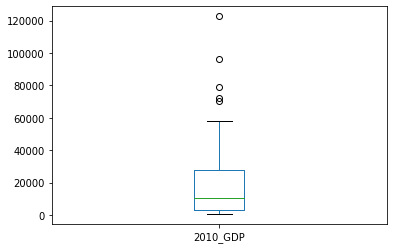

In [48]:
df_Exp_GDP['2010_GDP'].plot(kind='box')

In [49]:
count3 = 0
my_list3 = []
for elem in df_data['Indicator Name']:
  if 'literacy' in elem:
    my_list3.append(df_data.loc[count3,:])     
  else:
    pass
  count3 = count3 + 1

In [50]:
df_literacy = pd.DataFrame(my_list3)

In [51]:
df_literacy['Indicator Name'].unique()

array(['Adult literacy rate, population 15+ years, both sexes (%)',
       'Adult literacy rate, population 15+ years, female (%)',
       'Adult literacy rate, population 15+ years, gender parity index (GPI)',
       'Adult literacy rate, population 15+ years, male (%)',
       'Elderly literacy rate, population 65+ years, both sexes (%)',
       'Elderly literacy rate, population 65+ years, female (%)',
       'Elderly literacy rate, population 65+ years, gender parity index (GPI)',
       'Elderly literacy rate, population 65+ years, male (%)',
       'PIAAC: Adults by literacy proficiency level (%). Below Level 1',
       'PIAAC: Adults by literacy proficiency level (%). Level 1',
       'PIAAC: Adults by literacy proficiency level (%). Level 2',
       'PIAAC: Adults by literacy proficiency level (%). Level 3',
       'PIAAC: Adults by literacy proficiency level (%). Level 4',
       'PIAAC: Adults by literacy proficiency level (%). Level 5',
       'PIAAC: Female adults by litera

In [52]:
df_literacy[df_literacy['Indicator Name'] == 'Adult literacy rate, population 15+ years, both sexes (%)'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 20 to 883285
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    242 non-null    object 
 1   Country Code    242 non-null    object 
 2   Indicator Name  242 non-null    object 
 3   Indicator Code  242 non-null    object 
 4   2000            62 non-null     float64
 5   2001            50 non-null     float64
 6   2002            39 non-null     float64
 7   2003            31 non-null     float64
 8   2004            38 non-null     float64
 9   2005            40 non-null     float64
 10  2006            46 non-null     float64
 11  2007            55 non-null     float64
 12  2008            51 non-null     float64
 13  2009            52 non-null     float64
 14  2010            67 non-null     float64
 15  2011            77 non-null     float64
 16  2012            62 non-null     float64
 17  2013            50 non-null    

In [53]:
df_literacy_2011 = df_literacy[df_literacy['Indicator Name'] == 'Adult literacy rate, population 15+ years, both sexes (%)'][['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code','2011']]

In [54]:
df_literacy_2011 = df_literacy_2011[~df_literacy_2011['2011'].isna()]

In [55]:
countries = ['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka']

In [56]:
 count = 0
 list_co = []
 for record in df_literacy_2011.sort_values('2011',ascending=False)['Country Name']:
   if record in countries:
     list_co.append(df_literacy_2011.sort_values('2011',ascending=False).reset_index(drop=True).loc[count,:])
   count = count + 1 

In [57]:
pd.DataFrame(list_co)[['Country Name', '2011']].set_index('Country Name')

,2011
Country Name,
India,69.30256
Nepal,59.62725
Pakistan,54.73802
Bangladesh,47.07731
Afghanistan,31.74112


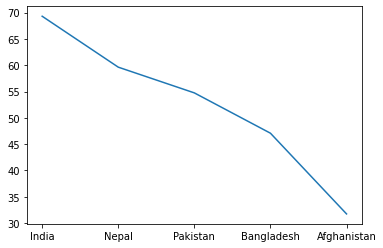

In [59]:
plt.plot(pd.DataFrame(list_co)[['Country Name', '2011']].set_index('Country Name'))

### **Some points to note from looking at basic information about the csv files.**

1. There are a lot of columns/features with a very low amount or zero entries, they probably won't be factored in our analysis.
2. Looks like we will have to use 2 features, Country Code and Series Code, to consolidate all the csv files.
3. Since there is no description on any of the features, we will have to explore their names and values in order to get a gist about them.
4. Data seems to have a lot of missing values, which might prove to be a hassle later on.

In [62]:
def get_reqDF(df,col,indicator):
  count = 0
  my_list = []
  for elem in col:
    if indicator in elem:
      my_list.append(df.loc[count,:])     
    else:
      pass
    count = count + 1
  
  return pd.DataFrame(my_list)

In [63]:
df_internet = get_reqDF(df_data,df_data['Indicator Name'],'Internet')

In [64]:
df_internet

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
1375,Arab World,ARB,Internet users (per 100 people),IT.NET.USER.P2,1.139541,1.561288,2.693061,3.645881,7.006812,8.393142,11.654648,14.205902,18.593531,22.973689,26.747251,29.707761,34.014224,36.868602,NaN,NaN
5040,East Asia & Pacific,EAS,Internet users (per 100 people),IT.NET.USER.P2,5.592680,7.252166,8.993588,10.547244,12.596964,14.666359,16.617828,20.766523,25.253566,29.513198,34.230838,37.365156,40.709345,44.577349,46.812103,49.787924
8705,East Asia & Pacific (excluding high income),EAP,Internet users (per 100 people),IT.NET.USER.P2,1.897116,2.779090,4.404990,5.762102,6.885265,8.319143,10.173972,14.382694,19.260138,23.769242,28.957572,32.385761,36.068349,39.708933,42.062234,45.210103
12370,Euro area,EMU,Internet users (per 100 people),IT.NET.USER.P2,22.524339,27.351403,35.191466,42.096423,47.484586,51.260509,54.936501,61.383050,64.843610,67.129830,71.036722,72.001164,74.092136,75.821560,77.002322,78.666346
16035,Europe & Central Asia,ECS,Internet users (per 100 people),IT.NET.USER.P2,13.184147,16.405569,23.057519,28.363374,32.359086,35.226932,38.083487,43.674382,47.359045,50.566038,56.119117,58.834630,63.486253,66.306669,68.944351,71.162003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869980,Virgin Islands (U.S.),VIR,Internet users (per 100 people),IT.NET.USER.P2,13.815081,18.375766,27.494432,27.429073,27.377009,27.344320,27.332611,27.339336,27.361777,27.396510,31.220000,35.600000,40.547900,45.300000,50.070000,54.839137
873645,West Bank and Gaza,PSE,Internet users (per 100 people),IT.NET.USER.P2,1.111306,1.836855,3.100092,4.130616,4.400905,16.005000,18.410000,21.176000,24.358000,32.230000,37.400000,41.080000,43.400000,46.600000,53.670000,57.424192
877310,"Yemen, Rep.",YEM,Internet users (per 100 people),IT.NET.USER.P2,0.082500,0.090802,0.518796,0.604734,0.881223,1.048598,1.247824,5.010000,6.890000,9.960000,12.350000,14.905000,17.446500,20.000000,22.550000,24.085409
880975,Zambia,ZMB,Internet users (per 100 people),IT.NET.USER.P2,0.191072,0.233130,0.477751,0.980483,2.013550,2.851752,4.159913,4.870000,5.550000,6.310000,10.000000,11.500000,13.468200,15.400000,19.000000,21.000000


In [65]:
lit_int_df =pd.merge(df_internet[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code','2011']], df_literacy_2011, on =['Country Name','Country Code'], suffixes = ('_internetUsers','_literacy'))

In [69]:
lit_int_df

,Country Name,Country Code,Indicator Name_internetUsers,Indicator Code_internetUsers,2011_internetUsers,Indicator Name_literacy,Indicator Code_literacy,2011_literacy
0,Arab World,ARB,Internet users (per 100 people),IT.NET.USER.P2,29.707761,"Adult literacy rate, population 15+ years, bot...",SE.ADT.LITR.ZS,77.364586
1,East Asia & Pacific,EAS,Internet users (per 100 people),IT.NET.USER.P2,37.365156,"Adult literacy rate, population 15+ years, bot...",SE.ADT.LITR.ZS,95.108223
2,East Asia & Pacific (excluding high income),EAP,Internet users (per 100 people),IT.NET.USER.P2,32.385761,"Adult literacy rate, population 15+ years, bot...",SE.ADT.LITR.ZS,94.751671
3,Europe & Central Asia,ECS,Internet users (per 100 people),IT.NET.USER.P2,58.834630,"Adult literacy rate, population 15+ years, bot...",SE.ADT.LITR.ZS,98.997589
4,Europe & Central Asia (excluding high income),ECA,Internet users (per 100 people),IT.NET.USER.P2,40.787203,"Adult literacy rate, population 15+ years, bot...",SE.ADT.LITR.ZS,98.799637
...,...,...,...,...,...,...,...,...
72,Turkey,TUR,Internet users (per 100 people),IT.NET.USER.P2,43.065710,"Adult literacy rate, population 15+ years, bot...",SE.ADT.LITR.ZS,94.106090
73,Uruguay,URY,Internet users (per 100 people),IT.NET.USER.P2,51.404661,"Adult literacy rate, population 15+ years, bot...",SE.ADT.LITR.ZS,98.335900
74,"Venezuela, RB",VEN,Internet users (per 100 people),IT.NET.USER.P2,40.220000,"Adult literacy rate, population 15+ years, bot...",SE.ADT.LITR.ZS,94.770220
75,West Bank and Gaza,PSE,Internet users (per 100 people),IT.NET.USER.P2,41.080000,"Adult literacy rate, population 15+ years, bot...",SE.ADT.LITR.ZS,95.267240


In [67]:
lit_int_df.corr()

,2011_internetUsers,2011_literacy
2011_internetUsers,1.000000,0.729788
2011_literacy,0.729788,1.000000


In [66]:
df_internet.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'],
      dtype='object')

In [68]:
df_literacy_2011

,Country Name,Country Code,Indicator Name,Indicator Code,2011
20,Arab World,ARB,"Adult literacy rate, population 15+ years, bot...",SE.ADT.LITR.ZS,77.364586
3685,East Asia & Pacific,EAS,"Adult literacy rate, population 15+ years, bot...",SE.ADT.LITR.ZS,95.108223
7350,East Asia & Pacific (excluding high income),EAP,"Adult literacy rate, population 15+ years, bot...",SE.ADT.LITR.ZS,94.751671
14680,Europe & Central Asia,ECS,"Adult literacy rate, population 15+ years, bot...",SE.ADT.LITR.ZS,98.997589
18345,Europe & Central Asia (excluding high income),ECA,"Adult literacy rate, population 15+ years, bot...",SE.ADT.LITR.ZS,98.799637
...,...,...,...,...,...
817315,Turkey,TUR,"Adult literacy rate, population 15+ years, bot...",SE.ADT.LITR.ZS,94.106090
850300,Uruguay,URY,"Adult literacy rate, population 15+ years, bot...",SE.ADT.LITR.ZS,98.335900
861295,"Venezuela, RB",VEN,"Adult literacy rate, population 15+ years, bot...",SE.ADT.LITR.ZS,94.770220
872290,West Bank and Gaza,PSE,"Adult literacy rate, population 15+ years, bot...",SE.ADT.LITR.ZS,95.267240


In [71]:
df_data['Indicator Name'].unique()

array(['Adjusted net enrolment rate, lower secondary, both sexes (%)',
       'Adjusted net enrolment rate, lower secondary, female (%)',
       'Adjusted net enrolment rate, lower secondary, gender parity index (GPI)',
       ..., 'Youth literacy rate, population 15-24 years, female (%)',
       'Youth literacy rate, population 15-24 years, gender parity index (GPI)',
       'Youth literacy rate, population 15-24 years, male (%)'],
      dtype=object)